# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import numpy as np
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from drive.MyDrive.Quora_Duplicate_Questions.src.functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
PATH = 'drive/MyDrive/Quora_Duplicate_Questions/'
data = pd.read_csv(PATH+'src/train.csv', index_col='id')

# Basic Data Analysis

In [72]:
data.shape

(404290, 5)

In [29]:
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [73]:
data.isnull().sum()

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

Instead of dropping the nulls, we will fill them with an empty string. This way the model will be robust towards an empty string if there is no blank question prevention in place

In [75]:
data.fillna('', inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404290 non-null  int64 
 1   qid2          404290 non-null  int64 
 2   question1     404290 non-null  object
 3   question2     404290 non-null  object
 4   is_duplicate  404290 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


We see saw there were three missing values which were dropped. The binary target is int64 which we can cast as int8 to save memory and speed computations.

In [77]:
data['is_duplicate'] = data['is_duplicate'].astype('int8')

# Target Analysis

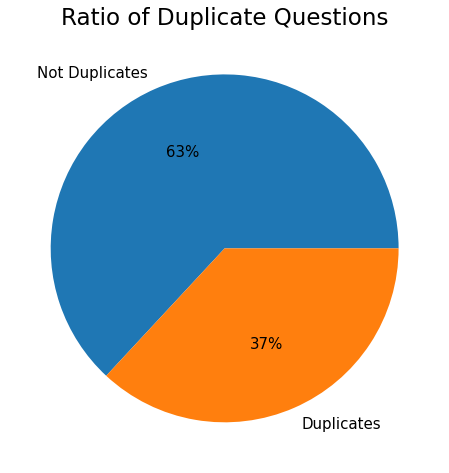

In [26]:
not_dup = data[data['is_duplicate'] == 0].shape[0]
dup = data[data['is_duplicate'] == 1].shape[0]

plt.figure(figsize=(8, 8))
plt.pie(x=[not_dup, dup], labels=['Not Duplicates', 'Duplicates'], autopct='%.0f%%', colors=sns.color_palette('tab10'), textprops={'fontsize': 15})
plt.title('Ratio of Duplicate Questions', fontsize=23)
plt.show()

# Questions Analysis

## Repeats

In [78]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_qs = len(qids.unique())
repeats = np.sum(qids.value_counts() > 1)
print(f'Number of unique questions: {unique_qs}\nNumber of questions repeated: {repeats}\nMax amount repeated: {max(qids.value_counts())}')

Number of unique questions: 537933
Number of questions repeated: 111780
Max amount repeated: 157


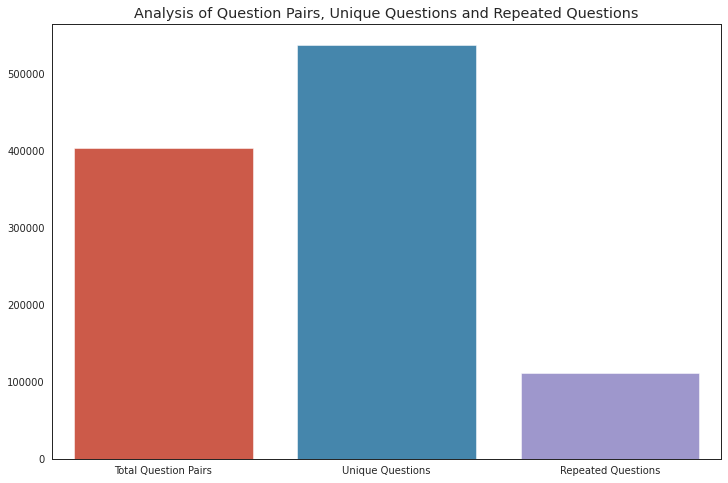

In [79]:
pairs_queried = data.shape[0]

plt.figure(figsize=(12, 8))
sns.barplot(x=['Total Question Pairs', 'Unique Questions', 'Repeated Questions'], y=[pairs_queried, unique_qs, repeats])
plt.title('Analysis of Question Pairs, Unique Questions and Repeated Questions')
plt.show()

## Duplicate question pairs

In [80]:
np.sum(data[['qid1','qid2']].groupby(['qid1','qid2']).size() > 1)

0

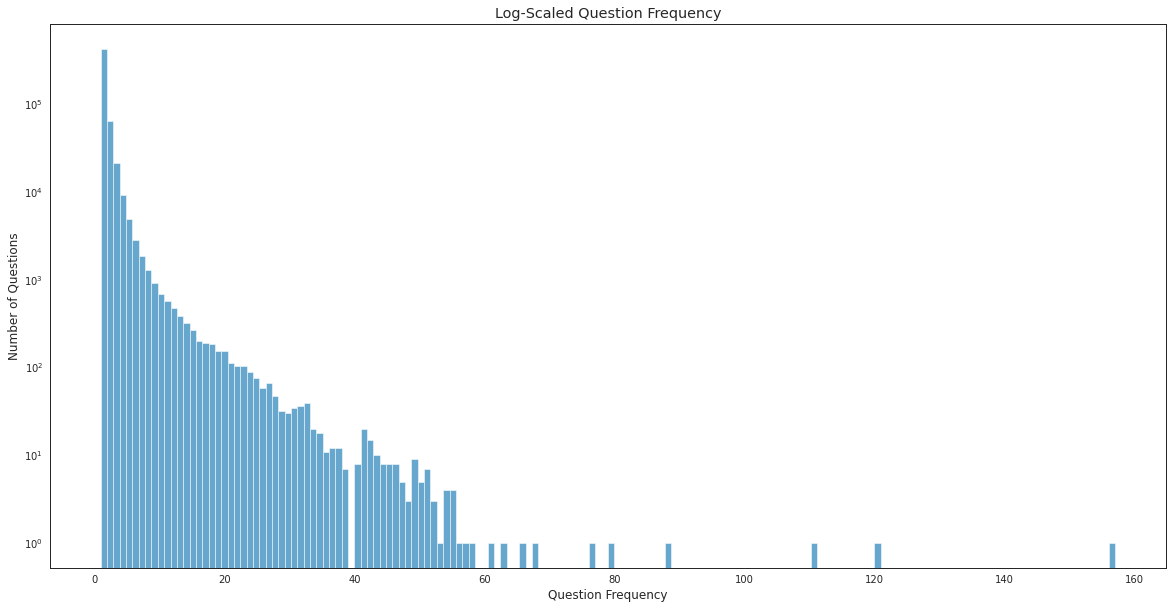

In [81]:
plt.figure(figsize=(20,10))
sns.set_style('white')
sns.histplot(qids.value_counts(), bins=160, log_scale=[False, True])
plt.title('Log-Scaled Question Frequency')
plt.xlabel('Question Frequency')
plt.ylabel('Number of Questions')
plt.show()